In [ ]:
%cd /content/drive/MyDrive/AI/MoneyVietnam/

/content/drive/MyDrive/AI/MoneyVietnam


In [ ]:
#Import các thư viện liên quan cần sử dụng
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Thư viện tạo mô hình CNN
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, Dropout
from keras.layers import LeakyReLU

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical # one hot encoding

#Thư viện vẽ đồ thị
from matplotlib import pyplot as plt 

from sklearn import preprocessing
from tensorflow.keras.models import load_model
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import os
import numpy as np

train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu chứa dữ liệu dùng để training
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/MoneyVietnam/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 408 images belonging to 6 classes.


In [ ]:
# Lấy ra tên của từng thư mục chứa từng loại dữ liệu
training_set.class_indices

{'10000 VND': 0,
 '100000 VND': 1,
 '20000 VND': 2,
 '5000 VND': 3,
 '50000 VND': 4,
 '500000 VND': 5}

In [ ]:
#Define và compile CNN model
model=Sequential()

# Nhân tích chập 32 lần
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
#Hàm loại bỏ
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))
# Nhân tích chập 64 lần 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
#Hàm loại bỏ
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))
# Nhân tích chập 128 lần 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
#Hàm loại bỏ
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
#Complie mô hình CNN
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#Lưu lại giá trị mỗi lần học để vẽ ra đồ thị
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1)

Epoch 1/100
13/13 [==============================] - 245s 18s/step - loss: 12.0651 - accuracy: 0.2083
Epoch 2/100
13/13 [==============================] - 8s 601ms/step - loss: 1.5879 - accuracy: 0.3309
Epoch 3/100
13/13 [==============================] - 8s 589ms/step - loss: 1.3700 - accuracy: 0.4608
Epoch 4/100
13/13 [==============================] - 10s 737ms/step - loss: 1.2298 - accuracy: 0.4975
Epoch 5/100
13/13 [==============================] - 11s 888ms/step - loss: 1.1327 - accuracy: 0.5123
Epoch 6/100
13/13 [==============================] - 8s 604ms/step - loss: 0.9559 - accuracy: 0.6054
Epoch 7/100
13/13 [==============================] - 9s 714ms/step - loss: 0.9739 - accuracy: 0.6176
Epoch 8/100
13/13 [==============================] - 9s 723ms/step - loss: 0.8934 - accuracy: 0.6422
Epoch 9/100
13/13 [==============================] - 11s 822ms/step - loss: 0.7782 - accuracy: 0.6985
Epoch 10/100
13/13 [==============================] - 8s 604ms/step - loss: 0.6995 - ac

In [ ]:
#Độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.08212145417928696
Train Accuracy 0.9656862616539001


<function matplotlib.pyplot.show(close=None, block=None)>

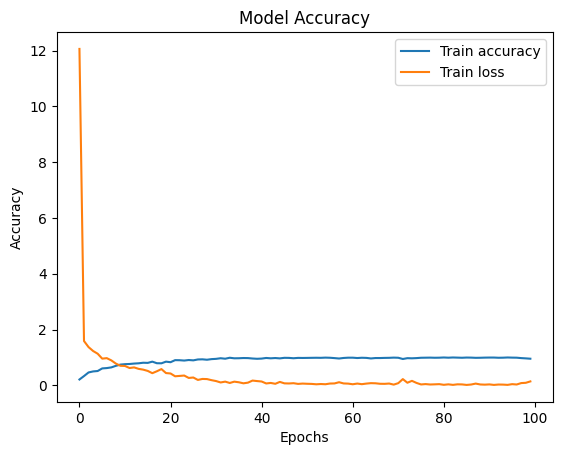

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train accuracy','Train loss'])
plt.show

In [ ]:
# Lưu lại dữ liệu sau khi train
model.save("MoneyVietnam.h5")

In [ ]:
#Load mô hình đã lưu
model_CNN=load_model('MoneyVietnam.h5')

1/1 [==============================] - 0s 216ms/step
5000 VND


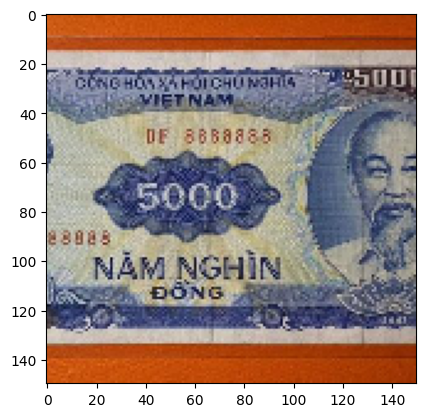

1/1 [==============================] - 0s 22ms/step
5000 VND


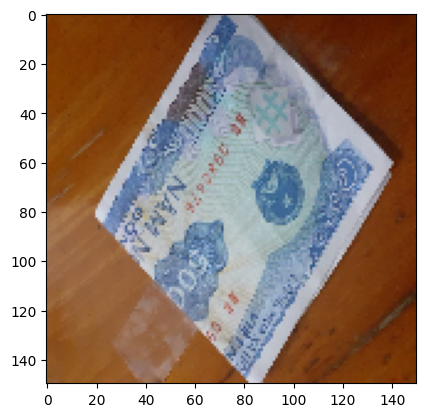

1/1 [==============================] - 0s 22ms/step
500000 VND


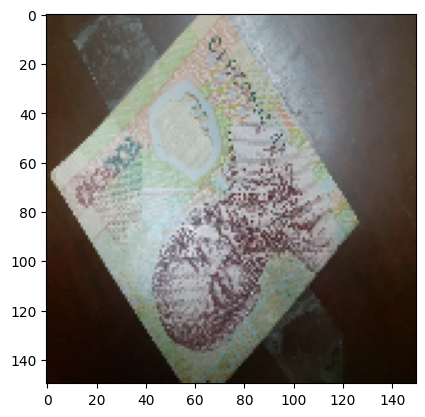

1/1 [==============================] - 0s 20ms/step
500000 VND


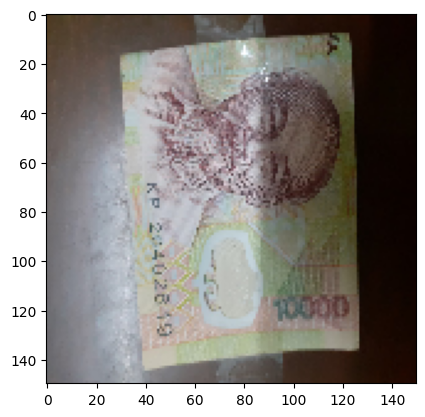

1/1 [==============================] - 0s 28ms/step
20000 VND


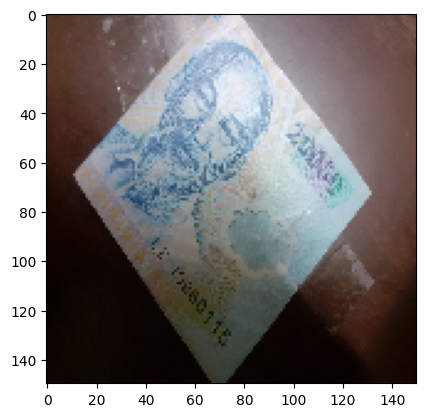

1/1 [==============================] - 0s 20ms/step
20000 VND


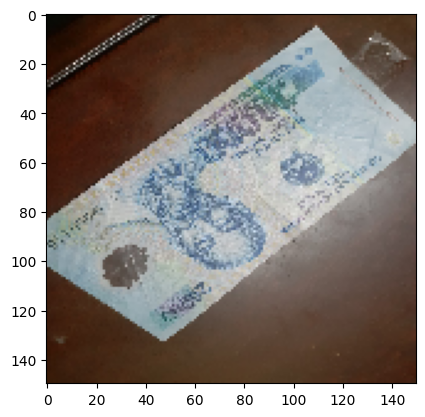

1/1 [==============================] - 0s 21ms/step
20000 VND


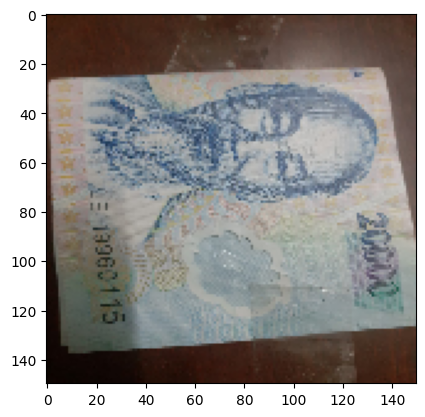

1/1 [==============================] - 0s 19ms/step
500000 VND


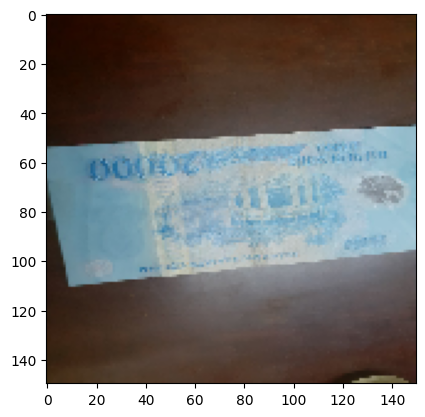

1/1 [==============================] - 0s 24ms/step
50000 VND


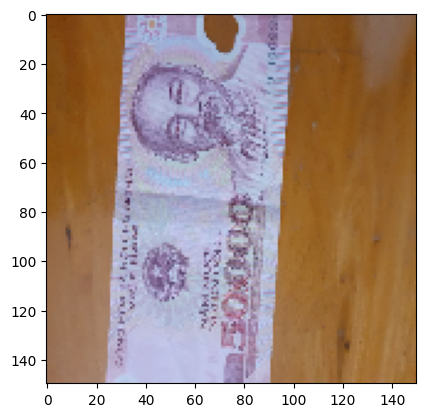

1/1 [==============================] - 0s 25ms/step
100000 VND


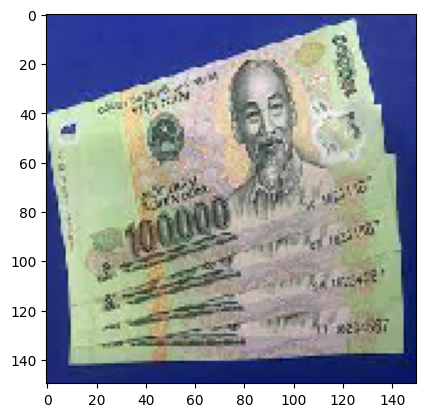

1/1 [==============================] - 0s 39ms/step
500000 VND


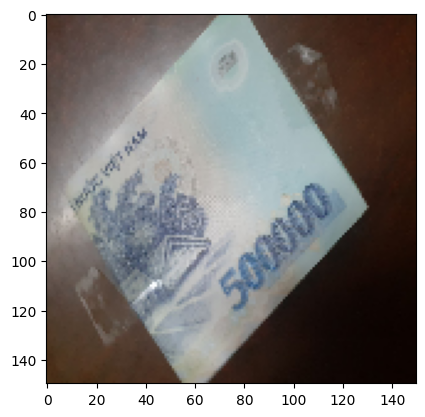

1/1 [==============================] - 0s 34ms/step
20000 VND


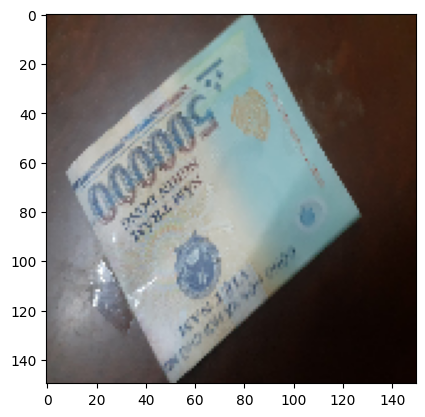

1/1 [==============================] - 0s 22ms/step
500000 VND


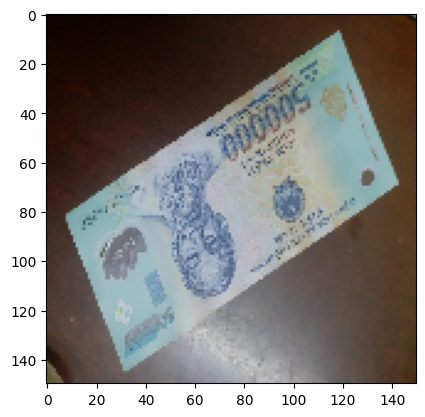

1/1 [==============================] - 0s 27ms/step
100000 VND


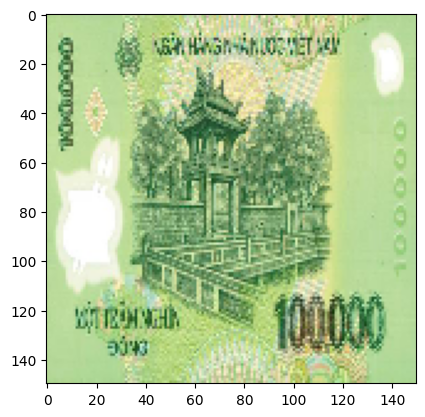

In [ ]:
#Testing
test="/content/drive/MyDrive/AI/MoneyVietnam/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  
  result = int(np.argmax(model_CNN.predict(img),axis =1))

  class_name=['10000 VND','100000 VND','20000 VND','5000 VND','50000 VND','500000 VND']
  
  print(class_name[result])
  plt.show()